In [11]:
import sys
sys.path.append("../../")
from QC5.ansatze.hea_and_hva.get_cir import *

In [12]:
class Mol1:
    def __init__(self):
        self.nqubits = 8
        self.nelec = (2,2)
mol1 = Mol1()

# 1D

## ry_full

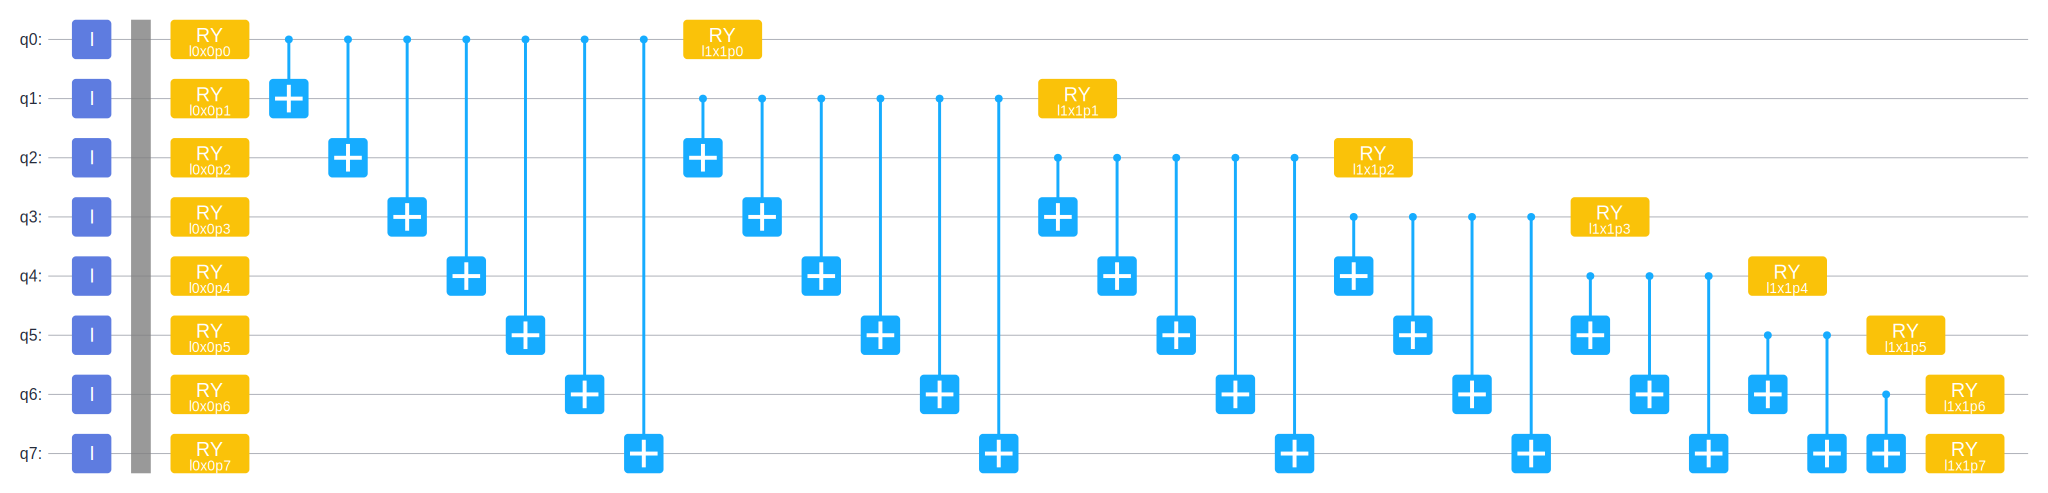

In [13]:
nlayer = 1
hea_type = 'ry_full'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type)
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type)
assert(len(cir.params_name)==num)
cir.svg()

## ry_linear

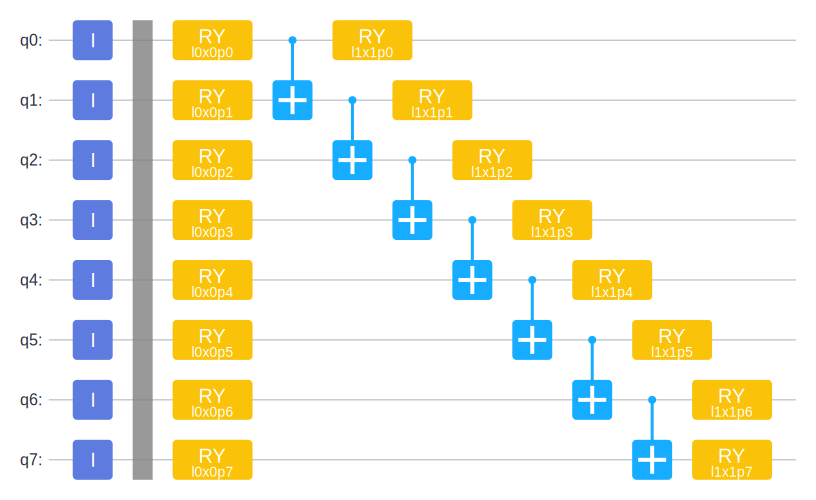

In [14]:
nlayer = 1
hea_type = 'ry_linear'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type)
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type)
assert(len(cir.params_name)==num)
cir.svg()

## ry_cacade

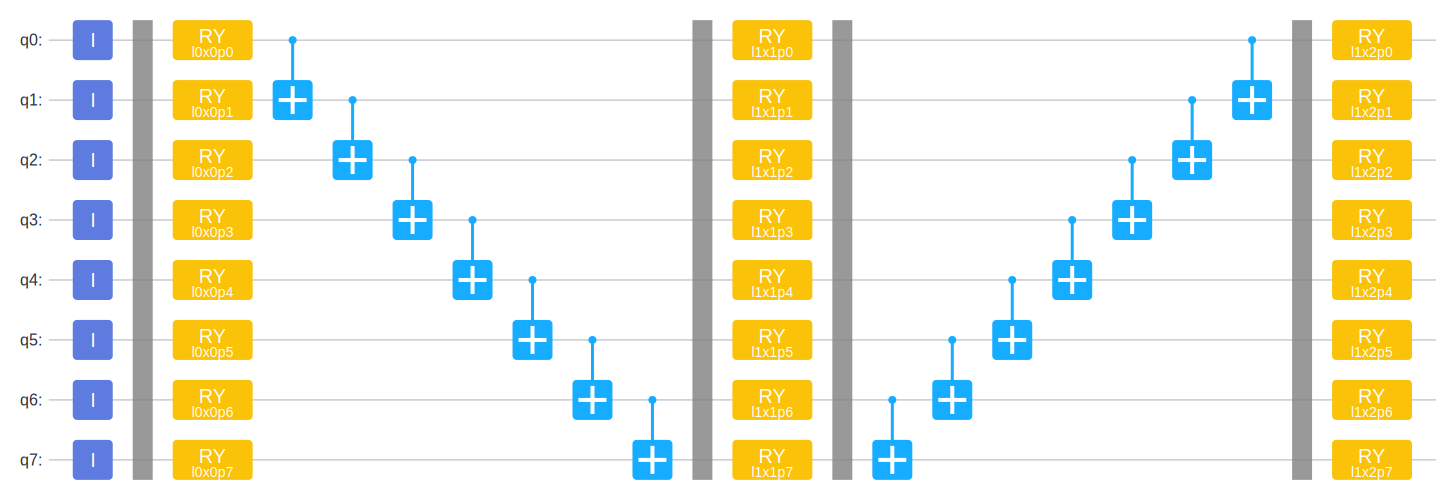

In [15]:
nlayer = 1
hea_type = 'ry_cascade'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type)
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type)
assert(len(cir.params_name)==num)
cir.svg()

## EfficientSU2

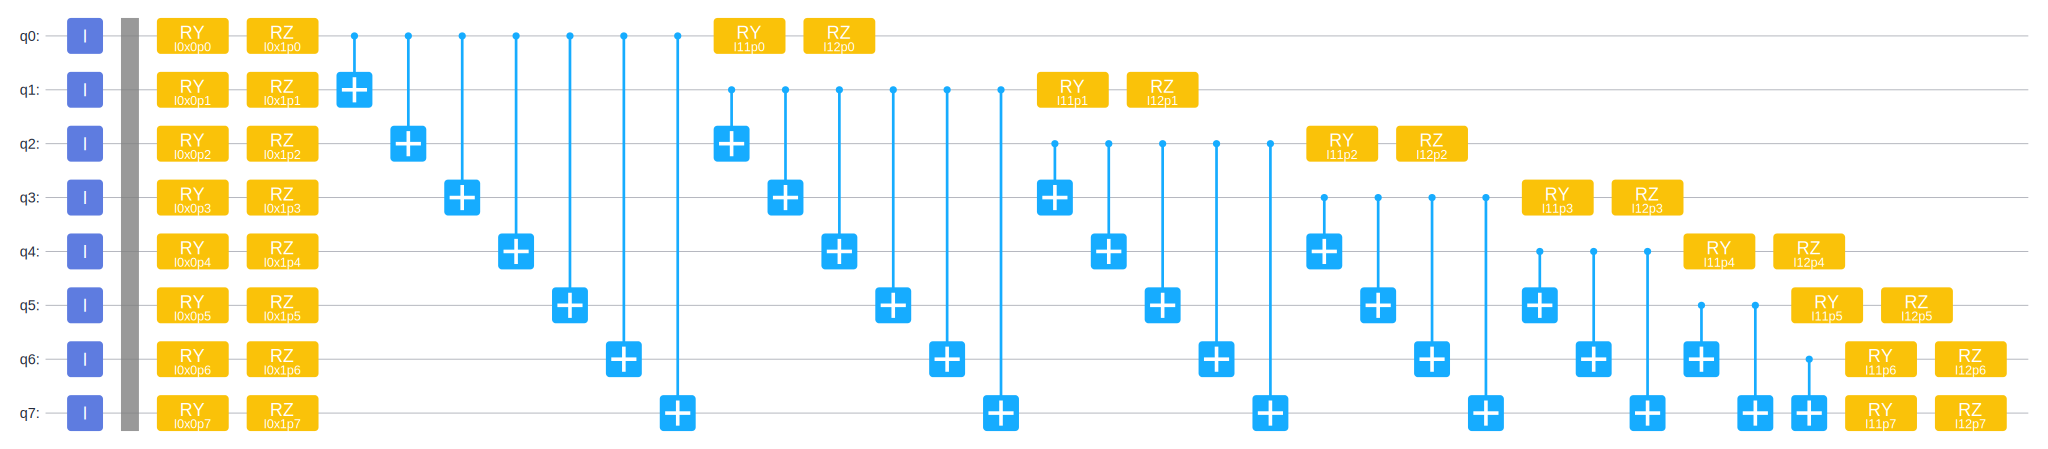

In [16]:
nlayer = 1
hea_type = 'EfficientSU2'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type)
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type)
assert(len(cir.params_name)==num)
cir.svg()

## ASWAP

In [17]:
def Amat(theta,phi):
    return np.array([[1,0.,0.,0.],
                    [0.,np.cos(theta),np.exp(1j*phi)*np.sin(theta),0.],
                    [0.,np.exp(-1j*phi)*np.sin(theta),-np.cos(theta),0.],
                    [0.,0.,0.,1]])

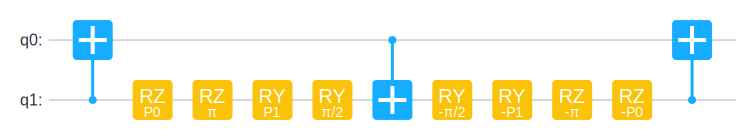

In [18]:
A = Agate(0,1,'P0','P1')
A.svg()

In [19]:
for theta in [0,1]:
    for phi in [0,1,3]:
        c1 = Agate(0,1,'P0','P1')
        pr = dict(zip(c1.params_name,[phi,theta]))
        c1 = c1.apply_value(pr=pr)
        print(np.allclose(c1.matrix(),Amat(theta,phi)))

True
True
True
True
True
True


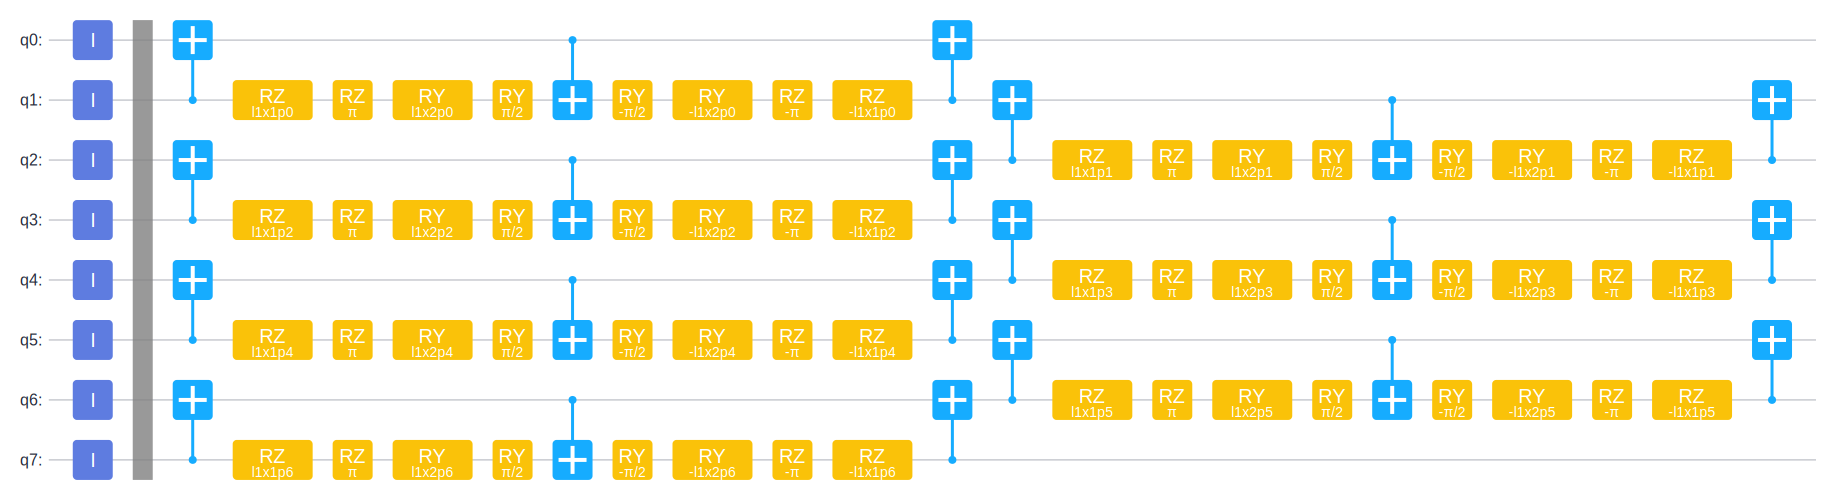

In [20]:
nlayer = 1
hea_type = 'ASWAP'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type)
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type)
assert(len(cir.params_name)==num)
cir.svg()

## SWAP^aGate

In [21]:
import numpy as np
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import gene_univ_parameterized_gate
from mindquantum.simulator import Simulator

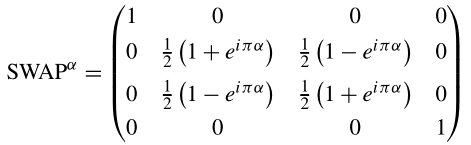

In [22]:
def matrix(alpha):
    ep = 0.5 * (1 + np.exp(1j * np.pi * alpha))
    em = 0.5 * (1 - np.exp(1j * np.pi * alpha))
    return np.array([
        [1 + 0.0j, 0, 0, 0],
        [0, ep, em, 0],
        [0, em, ep, 0],
        [0, 0, 0, 1 + 0.0j],
    ])


def diff_matrix(alpha):
    ep = 0.5 * 1j * np.pi * np.exp(1j * np.pi * alpha)
    em = -0.5 * 1j * np.pi * np.exp(1j * np.pi * alpha)
    return np.array([
        [0.0j, 0, 0, 0],
        [0, ep, em, 0],
        [0, em, ep, 0],
        [0, 0, 0, 0.0j],
    ])

TestGate2 = gene_univ_parameterized_gate('SWAPalpha', matrix, diff_matrix)

In [23]:
nqubits = 4
circ = Circuit()
for i in range(nqubits):
    circ += RY('p'+str(i)).on(i)
circ += TestGate2('p'+str(nqubits+0)).on([0, 1])
circ += TestGate2('p'+str(nqubits+1)).on([1, 2])
circ += TestGate2('p'+str(nqubits+2)).on([2, 3])
for i in range(nqubits):
    circ += RY('p'+str(i+7)).on(i)
print(circ)

q0: ──RY(p0)────SWAPalpha(p4)────────RY(p7)─────────────────────────────────
                      │
q1: ──RY(p1)────SWAPalpha(p4)────SWAPalpha(p5)────────RY(p8)────────────────
                                       │
q2: ──RY(p2)─────────────────────SWAPalpha(p5)────SWAPalpha(p6)─────RY(p9)──
                                                        │
q3: ──RY(p3)──────────────────────────────────────SWAPalpha(p6)────RY(p10)──


In [24]:
from scipy.optimize import check_grad

def energy_fun(initial_amplitudes):
    ene_pqc = get_expect_pqc(qh, circ)
    f,g = ene_pqc(initial_amplitudes)
    f = np.real(f)[0, 0]
    g = np.real(g)[0, 0]
    return f
def grad_fun(initial_amplitudes):
    ene_pqc = get_expect_pqc(qh, circ)
    f,g = ene_pqc(initial_amplitudes)
    f = np.real(f)[0, 0]
    g = np.real(g)[0, 0]
    #print(g)
    return g

for idx in range(5):
    initial_amplitudes = np.random.uniform(0,0.5,len(circ.params_name))
    check = check_grad(energy_fun, grad_fun, initial_amplitudes)
    print('check',check)
# Check the correctness of a gradient function by comparing it against a (forward) finite-difference approximation of the gradient.    
# 这么看梯度没有问题

NameError: name 'get_expect_pqc' is not defined

## PIHea

In [ ]:
gates = ['X','Y','Z','I']
hea_type_list = []
for g1 in gates:
    for g2 in gates:
        for g3 in gates:
            hea_type = g1+g2+g3+'2F'
            hea_type_list.append(hea_type)
print(hea_type_list)

In [ ]:
U2 = G2F(0,1,'p0','p1')
U2.svg()

In [ ]:
G2 = G2F_decomposed(0,1,'p0','p1') # (phi,theta)
G2.svg()

In [ ]:
# mindquantum CNOT
cnot = Circuit(X.on(1,0))
cnot_mat = cnot.matrix()
cnot_mat

In [ ]:
# the difference between G2 and U2
phi = 1
theta = 1
pr = {'p0':phi,'p1':theta}
pr2 = {'p0':-phi,'p1':theta}
g2_mat = G2.matrix(pr=pr)*np.exp(-1j*phi/4)
u2_mat = U2.matrix(pr=pr)

In [ ]:
print(np.round(g2_mat,3))
print(np.round(u2_mat,3))
print(np.allclose(np.abs(g2_mat),np.abs(u2_mat)),np.allclose(g2_mat,u2_mat))

In [ ]:
np.allclose(g2_mat.conj().T @ g2_mat, u2_mat.conj().T @ u2_mat)

In [ ]:
# G2Fsim - CNOT
g2_cnot_mat = G2.matrix(pr={'p0':np.pi,'p1':0})
np.isclose(cnot_mat,g2_cnot_mat*np.exp(-1j*np.pi/4))

In [ ]:
# U2Fsim - CNOT
g2_cnot_mat = U2.matrix(pr={'p0':np.pi,'p1':0})
np.isclose(cnot_mat,g2_cnot_mat)

In [ ]:
from mindquantum.core.gates import ISWAP
iswap = Circuit(ISWAP.on([1,0]))
iswap_mat = iswap.matrix()
iswap_mat

In [ ]:
g2_iswap_mat = G2.matrix(pr={'p0':0,'p1':-np.pi/2})
np.isclose(g2_iswap_mat,iswap_mat)

In [ ]:
g2_iswap_mat = U2.matrix(pr={'p0':0,'p1':-np.pi/2})
np.isclose(g2_iswap_mat,iswap_mat)

In [ ]:
iden_mat = G2.matrix(pr={'p0':0,'p1':0})
iden_mat

In [25]:
iden_mat = U2.matrix(pr={'p0':0,'p1':0})
iden_mat

NameError: name 'U2' is not defined

In [26]:
test = Circuit()
test+= RX(1).on(0)
test+= RZ(1).on(0)
test.matrix()

array([[ 0.77015115-0.42073549j, -0.22984885-0.42073549j],
       [ 0.22984885-0.42073549j,  0.77015115+0.42073549j]])

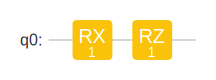

In [27]:
test.svg()

## YXY2F

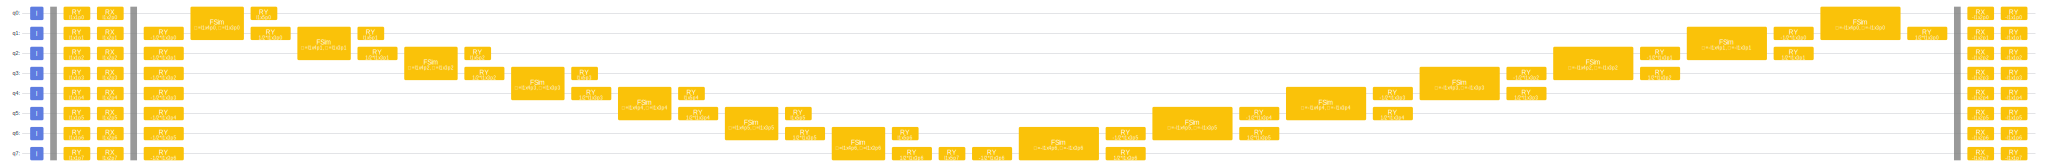

In [28]:
nlayer = 1
hea_type = 'YXY2F'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type)
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type)
assert(len(cir.params_name)==num)
cir.svg()

## XYZ2F

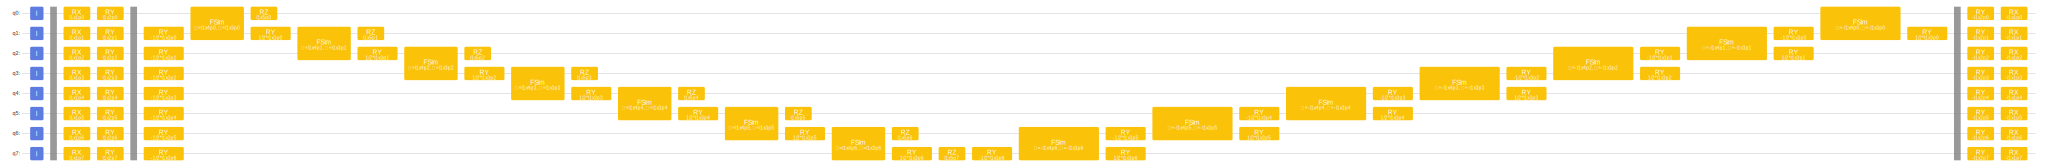

In [29]:
nlayer = 1
hea_type = 'XYZ2F'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type)
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type)
assert(len(cir.params_name)==num)
cir.svg()

# XYZ2F_2D_heisenberg

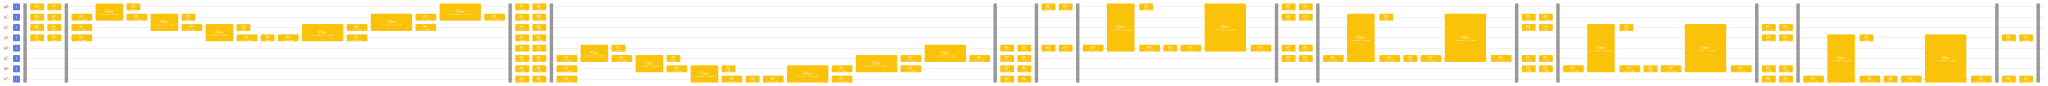

In [30]:
nlayer = 1
hea_type = 'XYZ2F_2D_heisenberg'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type,size=(2,4))
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type,size=(2,4))
assert(len(cir.params_name)==num)
cir.svg()

# XYZ2F_2D_hubbard

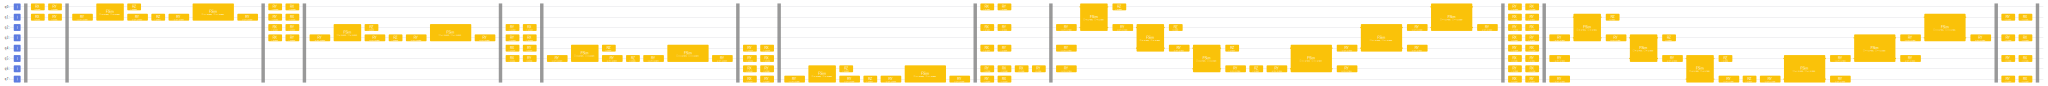

In [31]:
nlayer = 1
hea_type = 'XYZ2F_2D_hubbard'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type,size=(2,2))
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type,size=(2,2))
assert(len(cir.params_name)==num)
cir.svg()

# XYZ2F_2DX_hubbard

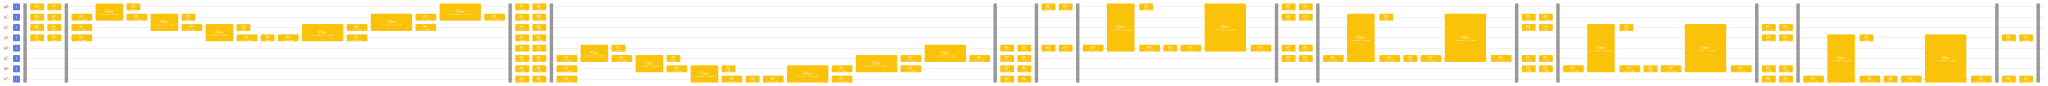

In [32]:
nlayer = 1
hea_type = 'XYZ2F_2DX_hubbard'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type,size=(2,2))
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type,size=(2,2))
assert(len(cir.params_name)==num)
cir.svg()

# hva_heisenberg

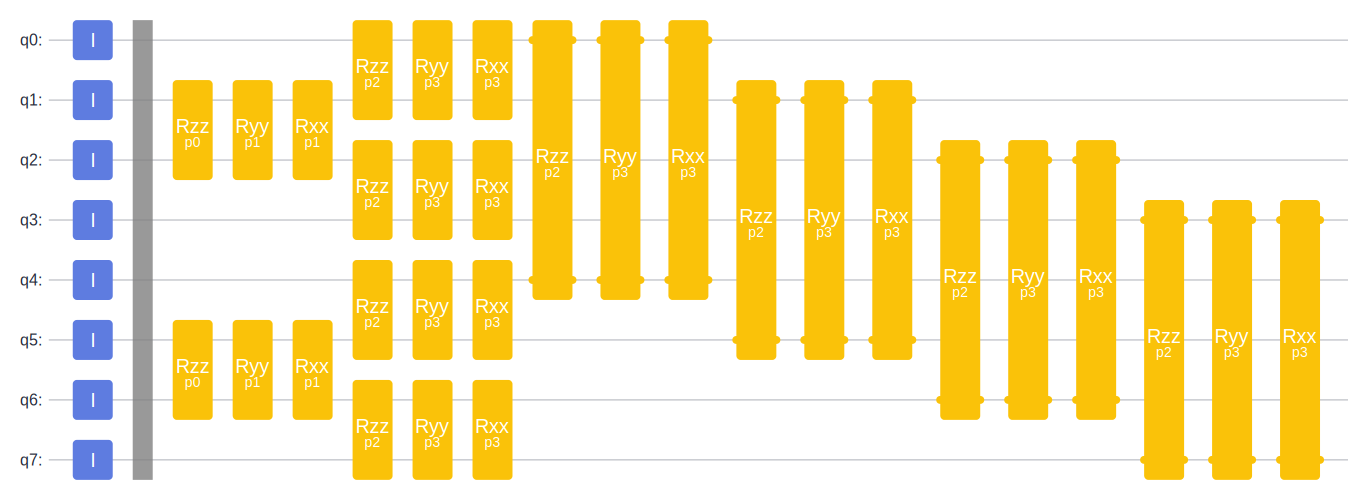

In [35]:
nlayer = 1
hea_type = 'hva_heisenberg'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type,size=(2,4))
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type,size=(2,4))
assert(len(cir.params_name)==num)
cir.svg()

# hva_hubbard

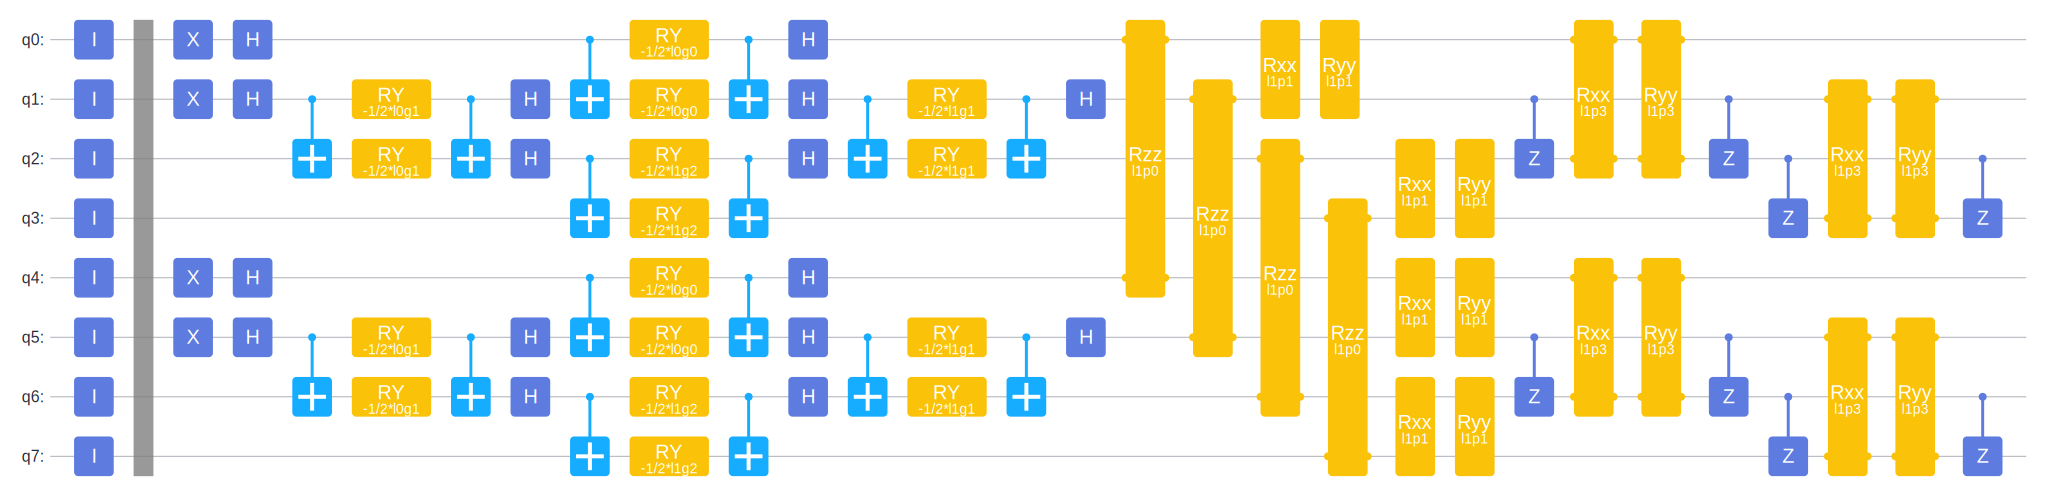

In [37]:
nlayer = 1
hea_type = 'hva_hubbard'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type,size=(2,2))
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type,size=(2,2))
assert(len(cir.params_name)==num)
cir.svg()

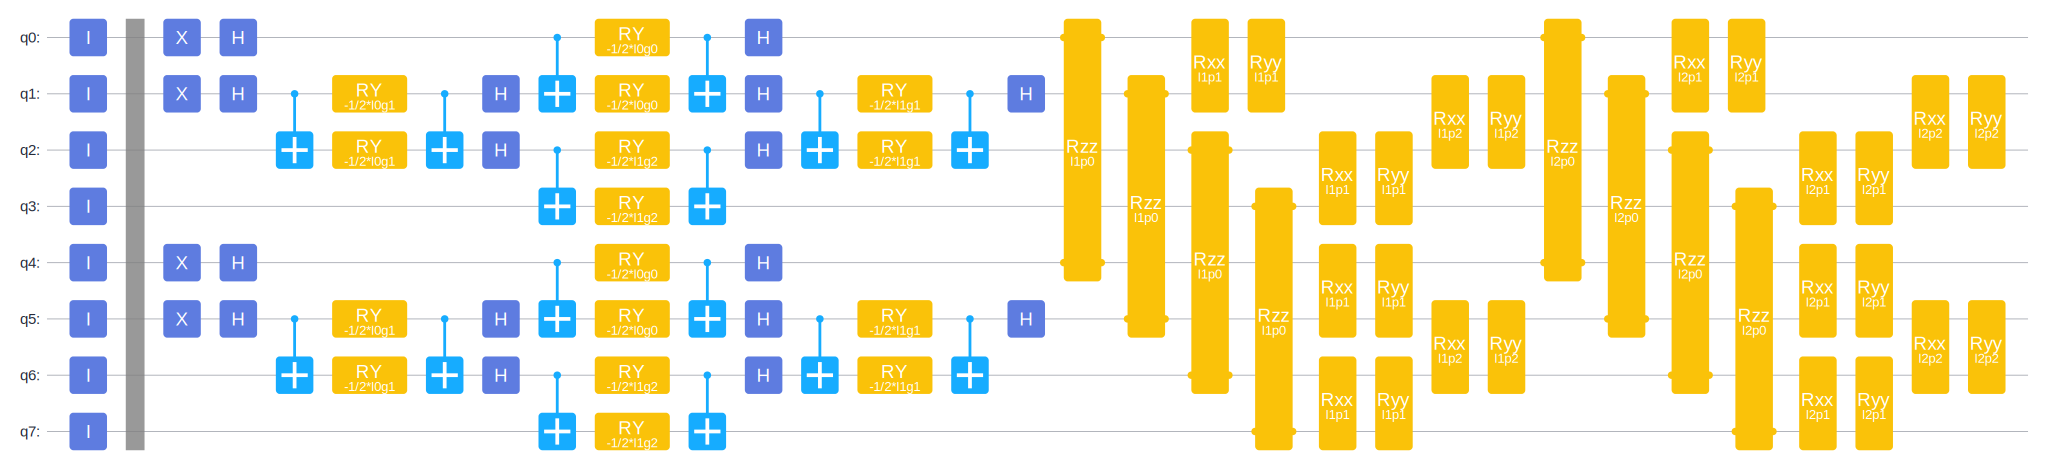

In [40]:
nlayer = 2
hea_type = 'hva_hubbard'
cir = get_hea_ansatz(mol1.nqubits,nlayer,hea_type,size=(1,4))
num = get_hea_nparams(mol1.nqubits, nlayer, hea_type,size=(1,4))
assert(len(cir.params_name)==num)
cir.svg()